In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
data_final_path = '/content/drive/MyDrive/Colab Notebooks/Wprowadzenie do AI/praca domowa 3/data-final.csv'

clust_data = pd.read_csv(data_final_path, delimiter='\t') # set delimeter to "\" to read the file
clustDataNum = clust_data.copy()
clustDataNum = clustDataNum.drop(['country', 'dateload'], axis=1)

In [3]:
clust_data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [4]:
clust_data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN7_E,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC
count,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,...,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013275e+06,1.013275e+06,1.013275e+06,1.013558e+06,1.015341e+06,1.015341e+06
mean,2.648067e+00,2.773115e+00,3.288349e+00,3.140595e+00,3.276960e+00,2.401100e+00,2.771744e+00,3.414818e+00,2.963740e+00,3.556469e+00,...,7.689488e+03,5.423945e+03,6.325802e+03,5.336311e+03,1.149510e+03,8.262611e+02,9.590748e+02,6.754233e+02,2.701410e+03,1.045211e+01
std,1.264407e+00,1.323943e+00,1.215006e+00,1.237442e+00,1.277593e+00,1.225721e+00,1.400336e+00,1.271915e+00,1.346040e+00,1.305232e+00,...,5.841987e+05,2.629748e+05,4.298906e+05,4.408225e+05,5.600884e+02,1.802490e+02,5.104005e+04,2.017864e+04,1.483898e+06,3.982879e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-6.181300e+04,-5.001200e+04,-9.598600e+04,-3.594871e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,...,2.279000e+03,2.144000e+03,2.329000e+03,1.484000e+03,4.140000e+02,7.200000e+02,5.000000e+00,1.710000e+02,9.000000e+00,1.000000e+00
50%,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,...,3.208000e+03,3.051000e+03,3.269000e+03,2.192000e+03,1.366000e+03,7.680000e+02,1.000000e+01,2.240000e+02,1.300000e+01,1.000000e+00
75%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,...,4.729000e+03,4.469000e+03,4.785000e+03,3.362000e+03,1.440000e+03,9.000000e+02,3.000000e+01,3.130000e+02,1.800000e+01,2.000000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,3.891434e+08,1.696693e+08,3.470326e+08,3.344289e+08,1.366000e+04,8.802000e+03,2.944307e+07,1.189272e+07,1.493327e+09,7.250000e+02


In [5]:
clust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB


In [6]:
clustDataNum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 108 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(2)
memory usage: 836.6+ MB


In [7]:
clustDataNum.shape[0]

1015341

In [8]:
rowsNum = clustDataNum.shape[0]*0.03 # reduce number of rows due to a long computing time of wcss and silhouette
clustDataNum = clustDataNum.sample(n=int(rowsNum), random_state=42)

In [9]:
clustDataNum.isna().sum() # check how many NAs is in clustDataNum

EXT1                     44
EXT2                     44
EXT3                     44
EXT4                     44
EXT5                     44
                         ..
testelapse               44
endelapse                 0
IPC                       0
lat_appx_lots_of_err      0
long_appx_lots_of_err     0
Length: 108, dtype: int64

In [10]:
allCols = clustDataNum.columns

In [11]:
# check which columns have the 'NONE' value - "NONE" prevents computing correlation matrix later on
print(clustDataNum.loc[clustDataNum.columns[clustDataNum.columns.str.contains(pat = 'NONE')]])

none_count = (clustDataNum == "NONE").sum().sum()
print(f'The value "NONE" occurs {none_count} times in the DataFrame.')

Empty DataFrame
Columns: [EXT1, EXT2, EXT3, EXT4, EXT5, EXT6, EXT7, EXT8, EXT9, EXT10, EST1, EST2, EST3, EST4, EST5, EST6, EST7, EST8, EST9, EST10, AGR1, AGR2, AGR3, AGR4, AGR5, AGR6, AGR7, AGR8, AGR9, AGR10, CSN1, CSN2, CSN3, CSN4, CSN5, CSN6, CSN7, CSN8, CSN9, CSN10, OPN1, OPN2, OPN3, OPN4, OPN5, OPN6, OPN7, OPN8, OPN9, OPN10, EXT1_E, EXT2_E, EXT3_E, EXT4_E, EXT5_E, EXT6_E, EXT7_E, EXT8_E, EXT9_E, EXT10_E, EST1_E, EST2_E, EST3_E, EST4_E, EST5_E, EST6_E, EST7_E, EST8_E, EST9_E, EST10_E, AGR1_E, AGR2_E, AGR3_E, AGR4_E, AGR5_E, AGR6_E, AGR7_E, AGR8_E, AGR9_E, AGR10_E, CSN1_E, CSN2_E, CSN3_E, CSN4_E, CSN5_E, CSN6_E, CSN7_E, CSN8_E, CSN9_E, CSN10_E, OPN1_E, OPN2_E, OPN3_E, OPN4_E, OPN5_E, OPN6_E, OPN7_E, OPN8_E, OPN9_E, OPN10_E, ...]
Index: []

[0 rows x 108 columns]
The value "NONE" occurs 784 times in the DataFrame.


In [12]:
# replace all "NONE" values with NANs

clustDataNum.replace('NONE', np.nan, inplace=True)

In [13]:
# ### One of my solutions for hadling "NONE" values.
# ### Left it for a future reference for my further learning as removing them didn't change the outputs that much

# # # remove all rows that have the value 'NONE' which prevents further computing.
# # # I've decided to remove those rows and not to replace the data due to the big size of the dataset.
# clustDataNum = clustDataNum[~clustDataNum.isin(['NONE']).any(axis=1)]

In [14]:
clustDataNum.isna().sum()

EXT1                      44
EXT2                      44
EXT3                      44
EXT4                      44
EXT5                      44
                        ... 
testelapse                44
endelapse                  0
IPC                        0
lat_appx_lots_of_err     392
long_appx_lots_of_err    392
Length: 108, dtype: int64

In [15]:
# clustDataNum = clustDataNum.dropna() # drop NA due to big size of the data. Decided not to remove the NAs but left this for future experiments

In [16]:
for col in allCols:
    imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
    clustDataNum[[col]] = imputer.fit_transform(clustDataNum[[col]])

In [17]:
clustDataNum.isna().sum() # double check how many NA values is in clustDataNum after SimpleImputer

EXT1                     0
EXT2                     0
EXT3                     0
EXT4                     0
EXT5                     0
                        ..
testelapse               0
endelapse                0
IPC                      0
lat_appx_lots_of_err     0
long_appx_lots_of_err    0
Length: 108, dtype: int64

<Axes: >

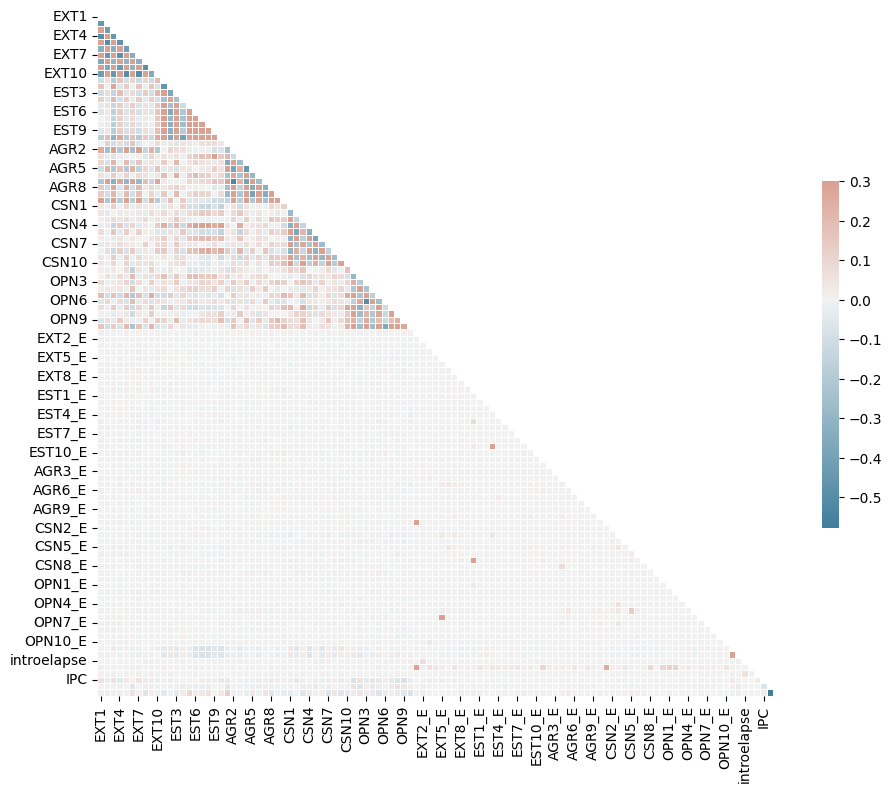

In [18]:
# Compute the correlation matrix
corr = clustDataNum.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

### StandardScaler

In [19]:
scale = StandardScaler()
scaledData = pd.DataFrame(scale.fit_transform(clustDataNum), columns = allCols)
scaledData.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC,lat_appx_lots_of_err,long_appx_lots_of_err
0,0.279402,0.171896,-0.235423,-0.921667,-0.218878,-0.324922,-0.547398,-0.324078,0.026801,1.110346,...,0.017629,-0.009126,-1.312870,-0.503200,-0.034553,-0.046183,-0.014728,-0.238485,0.458397,-0.417062
1,0.279402,-0.583323,0.588869,0.691814,0.564345,-1.147051,0.165955,1.247534,-0.714956,0.345575,...,-0.054076,-0.009336,-1.382574,-0.886642,-0.033361,-0.002750,-0.014750,-0.238485,0.669127,-1.043738
2,1.068547,-0.583323,0.588869,-0.114927,-0.218878,-1.147051,-0.547398,-0.324078,0.768559,0.345575,...,0.026541,-0.006007,-1.480875,-1.436798,-0.033808,-0.038713,-0.014706,-0.238485,0.230442,-0.570594
3,1.068547,-0.583323,0.588869,-0.921667,-0.218878,-1.147051,0.879308,-0.324078,0.768559,-0.419196,...,-0.052258,-0.011980,1.378796,1.408453,-0.025315,-0.048104,-0.014772,-0.238485,0.368643,-1.065109
4,-1.298887,1.682334,-0.235423,1.498555,-1.785323,0.497208,-1.260751,1.247534,-1.456713,1.110346,...,-0.042729,-0.007163,-1.382574,-0.886642,-0.034255,-0.044369,-0.014772,-0.238485,0.281246,-0.669221


### PCA

In [20]:
pca = PCA()
pca.fit_transform(scaledData)
print(pca.explained_variance_ratio_)

[0.06705407 0.04650227 0.0366898  0.03266907 0.02564872 0.01885302
 0.01678323 0.0159135  0.01474836 0.0131533  0.0127602  0.01237823
 0.01200367 0.01103809 0.0102167  0.01015987 0.00989975 0.00982705
 0.00975159 0.00967491 0.00954901 0.00950528 0.00946551 0.00945151
 0.00940396 0.00938722 0.00936746 0.00935226 0.00935069 0.00933234
 0.00932298 0.00930995 0.00929833 0.00928501 0.00928303 0.00927388
 0.00927222 0.00926205 0.00925668 0.00924708 0.00923454 0.00922755
 0.00921491 0.0092091  0.00918766 0.00918117 0.00917447 0.0091507
 0.00911766 0.00907588 0.00906691 0.00901459 0.00899097 0.00888334
 0.00885667 0.00852972 0.00851991 0.00840749 0.00835379 0.00812069
 0.0079345  0.00789068 0.00772554 0.0074142  0.00723608 0.00711538
 0.00673829 0.00665779 0.00656693 0.00644619 0.00630057 0.0062172
 0.00603249 0.00592375 0.00584707 0.00571156 0.0055878  0.00555473
 0.00550642 0.0054248  0.00514944 0.00507369 0.0049313  0.00489559
 0.00477154 0.004666   0.00451216 0.00447036 0.00428332 0.004138

In [21]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

94


In [22]:
pca = PCA(n_components = d)
reducedData = pca.fit_transform(scaledData)
recoveredData = pca.inverse_transform(reducedData)

In [23]:
reducedData.shape

(30460, 94)

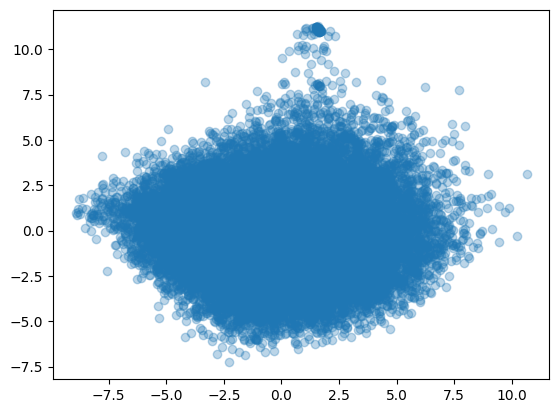

In [24]:
plt.scatter(reducedData[:, 0], reducedData[:, 1], alpha=0.3, label="samples")

Text(0.5, 0, 'PC3 Label')

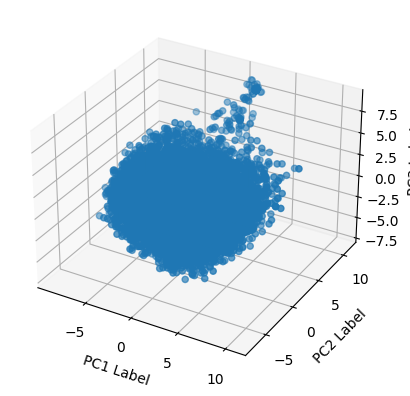

In [25]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(reducedData[:, 0], reducedData[:, 1], reducedData[:, 2])
ax.set_xlabel('PC1 Label')
ax.set_ylabel('PC2 Label')
ax.set_zlabel('PC3 Label')

## K-Means

### Elbow & silhouette

In [26]:
wcss = [] #  Sum of Squared Error (SSE)
silhouette = []

# Used MiniBatchKMeans due to a long computing time
for cluster in range(1, 11):
    kmeans = MiniBatchKMeans(n_clusters = cluster, init = 'k-means++', random_state = 42, n_init = 10, batch_size = 1024*8)
    kmeans.fit(reducedData)
    wcss.append(kmeans.inertia_)
    if cluster > 1:
      silhouette.append(silhouette_score(reducedData, kmeans.labels_))

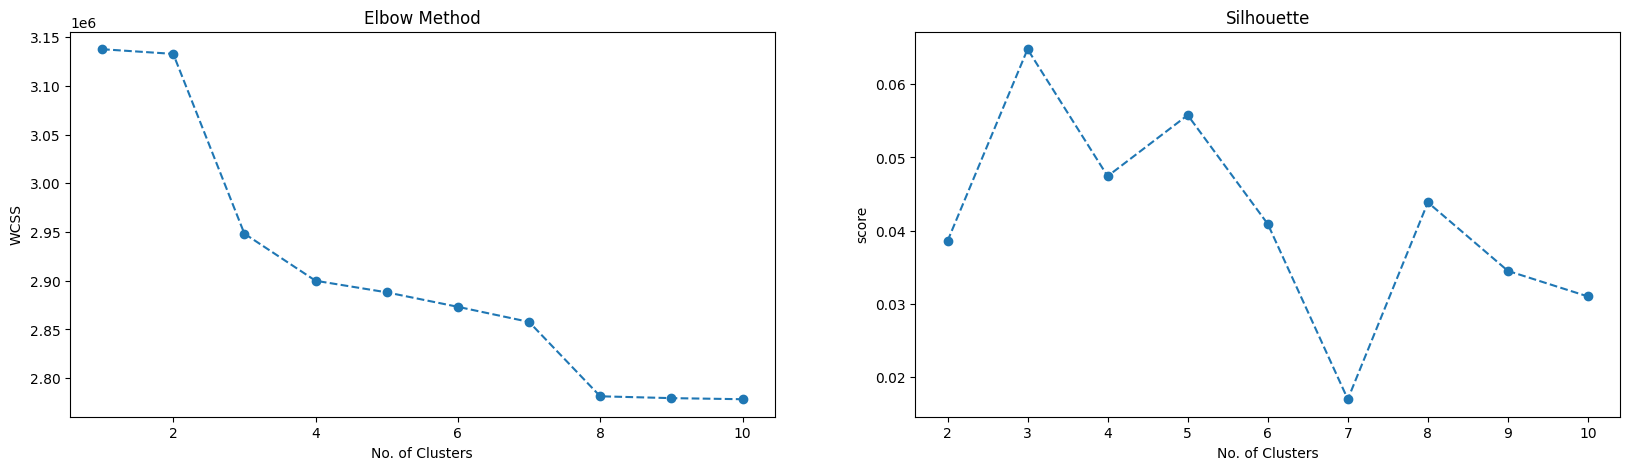

In [27]:
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, 'o--')
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette, 'o--')
plt.title('Silhouette')
plt.xlabel('No. of Clusters')
plt.ylabel('score')

plt.show()

In [28]:
# I chose 4 clusters due to from the elbow method plot above - point where tha angle of the tilt changes
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(reducedData)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [29]:
kmeans.labels_

array([1, 3, 2, ..., 2, 1, 3], dtype=int32)

In [30]:
clust_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067


In [31]:
pd.DataFrame({'clusters': kmeans.labels_})

,clusters
0,1
1,3
2,2
3,1
4,0
...,...
30455,3
30456,0
30457,2
30458,1


In [32]:
data_kmeans = pd.concat([clust_data, pd.DataFrame({'clusters': kmeans.labels_})], axis=1)

In [33]:
data_kmeans

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,clusters
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991,1.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833,2.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25,1.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208,NaN
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0,NaN
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777,NaN
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067,NaN


In [34]:
data_kmeans["clusters"].value_counts()

clusters
0.0    8486
1.0    8424
3.0    7376
2.0    6174
Name: count, dtype: int64

In [35]:
data_kmeans[data_kmeans["clusters"] == 0]

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,clusters
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0,0.0
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,...,360.0,640.0,36.0,179.0,10,1,US,30.3322,-81.6556,0.0
7,3.0,1.0,5.0,2.0,5.0,2.0,5.0,2.0,3.0,2.0,...,1440.0,900.0,15.0,210.0,17,1,MY,2.9927,101.7909,0.0
11,3.0,1.0,5.0,3.0,5.0,1.0,5.0,5.0,5.0,3.0,...,1280.0,720.0,10.0,172.0,8,1,PH,14.5833,120.9667,0.0
15,2.0,1.0,3.0,4.0,4.0,3.0,5.0,3.0,3.0,5.0,...,1366.0,768.0,9.0,641.0,19,1,IN,20.0,77.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30441,5.0,1.0,5.0,1.0,5.0,1.0,4.0,5.0,5.0,2.0,...,1280.0,800.0,208.0,139.0,32,1,US,61.2231,-149.8528,0.0
30442,4.0,4.0,3.0,4.0,4.0,2.0,3.0,5.0,2.0,4.0,...,375.0,667.0,3.0,185.0,84,1,US,28.0499,-82.3625,0.0
30449,2.0,3.0,2.0,2.0,4.0,3.0,1.0,5.0,1.0,4.0,...,1600.0,900.0,27.0,393.0,13,1,CA,43.6667,-79.4167,0.0
30451,2.0,4.0,3.0,4.0,2.0,4.0,3.0,5.0,2.0,5.0,...,375.0,667.0,9.0,201.0,13,1,US,38.0,-97.0,0.0


In [36]:
data_kmeans[data_kmeans["clusters"] == 0].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC,clusters
count,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,...,8486.000000,8.486000e+03,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8.486000e+03,8486.000000,8486.0
mean,2.680179,2.785411,3.314400,3.130097,3.267146,2.469951,2.789771,3.397714,3.004714,3.577893,...,4155.495169,9.195061e+03,3258.057035,1148.437544,819.269856,505.698444,488.224841,7.654496e+02,15.430827,0.0
std,1.255560,1.329695,1.220971,1.239802,1.279243,1.236731,1.383502,1.268015,1.344309,1.304632,...,7515.955957,3.956053e+05,8415.617029,530.704409,182.341184,9332.630710,3527.485529,1.947137e+04,46.842822,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1117.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000e+00,1.000000,0.0
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,2171.250000,2.357250e+03,1480.250000,601.000000,720.000000,4.000000,171.000000,9.000000e+00,1.000000,0.0
50%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,4.000000,...,3066.000000,3.318000e+03,2180.500000,1366.000000,768.000000,9.000000,221.000000,1.300000e+01,1.000000,0.0
75%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,...,4413.750000,4.771000e+03,3327.750000,1440.000000,900.000000,27.000000,300.000000,1.800000e+01,2.000000,0.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,339141.000000,3.641350e+07,557610.000000,5760.000000,2562.000000,511525.000000,172790.000000,1.153759e+06,361.000000,0.0


In [37]:
data_kmeans[data_kmeans["clusters"] == 1]

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,clusters
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991,1.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25,1.0
10,3.0,3.0,2.0,3.0,3.0,2.0,4.0,3.0,3.0,5.0,...,1440.0,900.0,6.0,110.0,7,1,UA,50.4333,30.5167,1.0
14,1.0,5.0,2.0,5.0,1.0,4.0,1.0,2.0,2.0,5.0,...,1920.0,1080.0,6.0,120.0,8,1,AU,-37.9333,145.2333,1.0
16,1.0,4.0,2.0,4.0,2.0,3.0,2.0,4.0,2.0,4.0,...,1920.0,1080.0,6.0,169.0,11,1,CA,47.4596,-69.7547,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30447,1.0,4.0,3.0,5.0,3.0,3.0,4.0,5.0,2.0,5.0,...,1024.0,600.0,41.0,169.0,13,1,VE,8.0,-66.0,1.0
30452,4.0,1.0,5.0,3.0,5.0,1.0,5.0,1.0,5.0,2.0,...,1366.0,768.0,3.0,234.0,14,1,US,38.0,-97.0,1.0
30453,5.0,2.0,4.0,3.0,4.0,3.0,4.0,2.0,3.0,4.0,...,1366.0,768.0,22.0,264.0,14,1,US,36.7417,-88.6367,1.0
30454,1.0,4.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,...,414.0,736.0,3.0,413.0,11,1,US,40.8583,-80.1272,1.0


In [38]:
data_kmeans[data_kmeans["clusters"] == 1].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC,clusters
count,8424.000000,8424.000000,8424.000000,8424.000000,8424.000000,8424.000000,8424.000000,8424.000000,8424.000000,8424.000000,...,8424.000000,8424.000000,8.424000e+03,8424.000000,8424.000000,8424.000000,8424.000000,8.424000e+03,8424.000000,8424.0
mean,2.663343,2.768993,3.337013,3.110874,3.282170,2.459046,2.822175,3.407764,3.012108,3.562322,...,4073.448243,4635.984093,3.399263e+03,1164.555081,824.328466,392.990978,537.004274,8.288723e+02,15.372745,1.0
std,1.255227,1.334501,1.200054,1.233243,1.262726,1.233215,1.384675,1.263386,1.339930,1.300110,...,6222.236702,10397.198406,1.947090e+04,526.303395,185.389289,7548.683269,7233.606271,2.864031e+04,47.138412,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,2.000000,2.000000e+00,1.000000,1.0
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,2133.750000,2357.000000,1.479000e+03,768.000000,732.000000,4.000000,170.000000,9.000000e+00,1.000000,1.0
50%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,4.000000,...,3045.000000,3295.500000,2.173000e+03,1366.000000,768.000000,10.000000,220.000000,1.300000e+01,1.000000,1.0
75%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,...,4405.000000,4791.000000,3.340000e+03,1440.000000,904.000000,28.000000,300.000000,1.800000e+01,2.000000,1.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,289992.000000,685240.000000,1.721084e+06,3840.000000,2560.000000,523686.000000,512692.000000,2.189154e+06,361.000000,1.0


In [39]:
data_kmeans[data_kmeans["clusters"] == 2]

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,clusters
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833,2.0
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,1600.0,1000.0,4.0,196.0,3,1,SE,59.3333,18.05,2.0
12,4.0,1.0,5.0,4.0,5.0,1.0,4.0,1.0,5.0,2.0,...,320.0,480.0,128.0,459.0,8,1,FR,48.8539,2.604,2.0
13,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,...,1920.0,1080.0,2.0,129.0,5,1,GB,53.8,-1.5833,2.0
30,2.0,4.0,5.0,4.0,4.0,1.0,5.0,4.0,4.0,3.0,...,1366.0,768.0,5.0,586.0,14,1,SE,58.3013,14.2878,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30438,4.0,1.0,5.0,1.0,5.0,1.0,4.0,2.0,4.0,2.0,...,375.0,667.0,4.0,215.0,13,1,US,43.6195,-116.1952,2.0
30443,5.0,2.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,1.0,...,768.0,1024.0,8.0,349.0,39,1,US,31.1064,-97.4071,2.0
30444,2.0,5.0,4.0,5.0,1.0,2.0,4.0,5.0,2.0,5.0,...,1920.0,1080.0,29.0,162.0,7,1,US,34.1489,-117.6564,2.0
30450,4.0,4.0,2.0,2.0,4.0,2.0,4.0,2.0,5.0,2.0,...,1920.0,1080.0,11.0,240.0,14,1,AU,-27.0,133.0,2.0


In [40]:
data_kmeans[data_kmeans["clusters"] == 2].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC,clusters
count,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,...,6174.000000,6.174000e+03,6.174000e+03,6174.000000,6174.000000,6174.000000,6174.000000,6.174000e+03,6174.000000,6174.0
mean,2.639618,2.812277,3.300454,3.169420,3.267736,2.459508,2.790735,3.427924,3.004859,3.603337,...,4136.627308,5.789701e+03,3.623022e+03,1137.210398,817.796242,402.470522,427.960965,1.231399e+03,14.136540,2.0
std,1.254517,1.327684,1.209315,1.233791,1.264503,1.242726,1.389346,1.269170,1.355004,1.303683,...,8452.372249,8.336085e+04,2.579001e+04,538.457146,187.465453,6591.404482,3331.706916,5.737258e+04,44.942388,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,2.000000e+00,1.000000,2.0
25%,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,...,2201.250000,2.392250e+03,1.516000e+03,480.000000,720.000000,4.000000,172.000000,9.000000e+00,1.000000,2.0
50%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,4.000000,...,3088.000000,3.370000e+03,2.220500e+03,1366.000000,768.000000,10.000000,221.000000,1.300000e+01,1.000000,2.0
75%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,...,4497.500000,4.816000e+03,3.434000e+03,1440.000000,900.000000,28.000000,301.000000,1.800000e+01,2.000000,2.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,418849.000000,6.481518e+06,1.933070e+06,4300.000000,2562.000000,306273.000000,149843.000000,4.406039e+06,297.000000,2.0


In [41]:
data_kmeans[data_kmeans["clusters"] == 3]

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,clusters
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706,3.0
8,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0,4.0,4.0,...,2560.0,1440.0,2.0,181.0,4,1,GB,53.423,-2.2166,3.0
9,1.0,5.0,3.0,5.0,2.0,3.0,2.0,4.0,5.0,4.0,...,1600.0,900.0,6.0,261.0,13,1,FI,60.1708,24.9375,3.0
25,2.0,2.0,3.0,5.0,5.0,3.0,5.0,5.0,4.0,5.0,...,360.0,640.0,22.0,220.0,16,1,CA,42.3997,-82.1996,3.0
26,4.0,1.0,5.0,3.0,5.0,1.0,5.0,5.0,5.0,1.0,...,1600.0,1200.0,24.0,940.0,8,3,GB,51.5,-0.13,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30440,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,2.0,...,360.0,640.0,113.0,163.0,13,1,NZ,-41.0,174.0,3.0
30445,3.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,...,1366.0,768.0,5.0,174.0,4,6,US,41.0655,-85.1605,3.0
30448,2.0,3.0,4.0,4.0,4.0,2.0,4.0,2.0,4.0,3.0,...,640.0,360.0,14.0,189.0,8,1,IE,53.7189,-6.3478,3.0
30455,4.0,1.0,5.0,3.0,5.0,1.0,5.0,4.0,5.0,4.0,...,320.0,568.0,488.0,329.0,14,1,EG,30.05,31.3666,3.0


In [42]:
data_kmeans[data_kmeans["clusters"] == 3].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC,clusters
count,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,7376.000000,...,7.376000e+03,7.376000e+03,7376.000000,7376.000000,7376.000000,7.376000e+03,7376.000000,7.376000e+03,7376.000000,7376.0
mean,2.681806,2.774810,3.312907,3.152793,3.293384,2.477766,2.795418,3.402522,2.997424,3.561144,...,4.399854e+03,4.926242e+03,3240.944957,1164.569957,822.295282,7.547368e+02,457.928416,4.513698e+02,14.734273,3.0
std,1.251884,1.315615,1.203825,1.232487,1.254746,1.241560,1.378984,1.272921,1.342649,1.301599,...,1.855336e+04,1.744904e+04,7235.395762,527.660558,184.469008,2.007202e+04,4263.802792,1.891364e+04,45.828851,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,-6.701500e+04,0.000000,0.000000,0.000000,1.000000e+00,3.000000,2.000000e+00,1.000000,3.0
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,2.155000e+03,2.344750e+03,1466.000000,768.000000,732.000000,4.000000e+00,170.000000,9.000000e+00,1.000000,3.0
50%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,4.000000,...,3.052500e+03,3.330500e+03,2183.000000,1366.000000,768.000000,1.000000e+01,220.000000,1.300000e+01,1.000000,3.0
75%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,...,4.416000e+03,4.857500e+03,3354.500000,1440.000000,900.000000,2.900000e+01,301.000000,1.800000e+01,2.000000,3.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.116778e+06,1.100198e+06,347771.000000,3840.000000,2160.000000,1.544809e+06,292233.000000,1.205109e+06,361.000000,3.0


Each of the clusters have similar values (like mean, std) for each column (treat from a personality test)

### KNearestNeighbors

In [43]:
neighbors = NearestNeighbors(n_neighbors = 7)
neighbors_fit = neighbors.fit(reducedData)
distances, indices = neighbors_fit.kneighbors(reducedData)

In [44]:
distances = np.sort(distances, axis=0)

In [45]:
distances[:, 1]

array([1.72039231e-03, 1.72039231e-03, 2.20758343e-03, ...,
       1.70566254e+02, 1.72097930e+02, 1.72440185e+02])

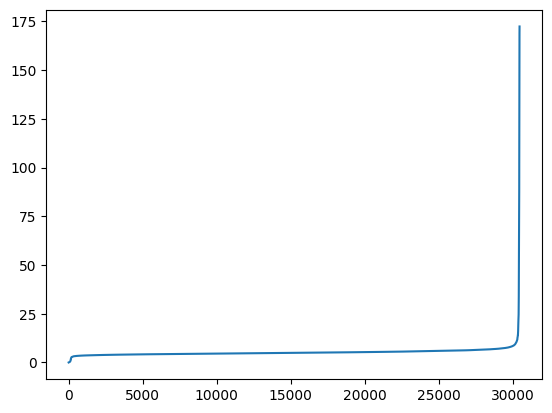

In [46]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

### DBSCAN

In [47]:
# eps - value of "elbow" from the plot above; min_samples - no. of dimentions + 1
dbscan_clust = DBSCAN(eps=4.0, min_samples=4).fit(reducedData)

In [48]:
dbscan_clust.labels_

array([-1, -1,  0, ..., -1, -1, -1])

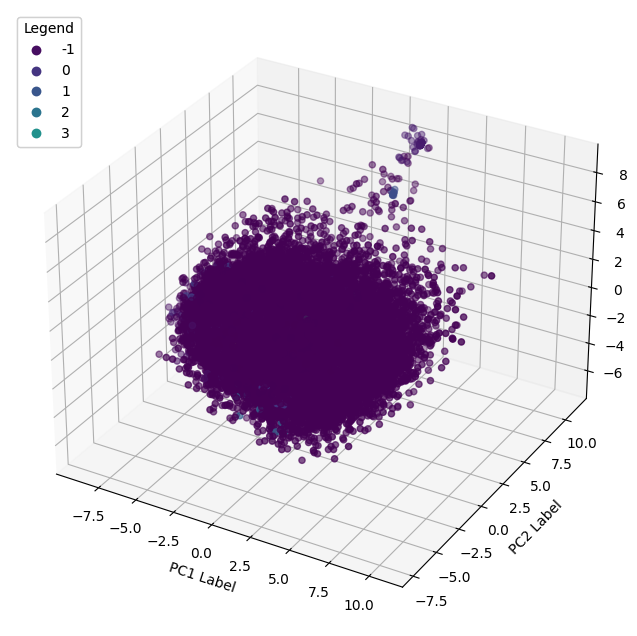

In [49]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('PC1 Label')
ax.set_ylabel('PC2 Label')
ax.set_zlabel('PC3 Label')

scatter = ax.scatter3D(reducedData[:, 0], reducedData[:, 1], reducedData[:, 2], c = dbscan_clust.labels_)

legend = ax.legend(*[scatter.legend_elements()[0], [-1, 0, 1, 2, 3]], title="Legend", loc='upper left')
ax.add_artist(legend)

plt.show()

In [50]:
num_neg_one = (dbscan_clust.labels_ == -1).sum()
num_zeros = (dbscan_clust.labels_ == 0).sum()
num_ones = (dbscan_clust.labels_ == 1).sum()
num_twos = (dbscan_clust.labels_ == 2).sum()
num_3s = (dbscan_clust.labels_ == 3).sum()

print(num_neg_one,"\n", num_zeros, "\n", num_ones, "\n", num_twos, "\n", num_3s)

27780 
 2464 
 85 
 6 
 13


In [51]:
data_dbscan = pd.concat([clust_data, pd.DataFrame({'dbscan_clusters': dbscan_clust.labels_})], axis=1)

In [52]:
data_dbscan[data_dbscan["dbscan_clusters"] == 0]

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,dbscan_clusters
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833,0.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25,0.0
18,4.0,2.0,5.0,3.0,4.0,4.0,5.0,2.0,5.0,2.0,...,1280.0,768.0,15.0,592.0,39,1,ZA,-29.0,24.0,0.0
41,3.0,4.0,3.0,4.0,4.0,2.0,2.0,2.0,4.0,4.0,...,1440.0,900.0,474.0,147.0,5,5,AU,-27.0,133.0,0.0
45,3.0,1.0,4.0,3.0,4.0,2.0,3.0,2.0,4.0,5.0,...,1438.0,808.0,90.0,208.0,13,3,IN,20.0,77.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30439,4.0,4.0,4.0,4.0,2.0,2.0,3.0,4.0,2.0,2.0,...,1280.0,800.0,19.0,195.0,23,2,US,30.5252,-84.3321,0.0
30446,2.0,2.0,4.0,3.0,5.0,2.0,2.0,4.0,2.0,3.0,...,1366.0,768.0,2.0,141.0,9,2,CA,46.0888,-64.7723,0.0
30447,1.0,4.0,3.0,5.0,3.0,3.0,4.0,5.0,2.0,5.0,...,1024.0,600.0,41.0,169.0,13,1,VE,8.0,-66.0,0.0
30448,2.0,3.0,4.0,4.0,4.0,2.0,4.0,2.0,4.0,3.0,...,640.0,360.0,14.0,189.0,8,1,IE,53.7189,-6.3478,0.0


In [53]:
data_dbscan[data_dbscan["dbscan_clusters"] == 0].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC,dbscan_clusters
count,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,...,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.0
mean,2.632305,2.804383,3.282468,3.137987,3.255276,2.471185,2.795860,3.385146,3.000812,3.583604,...,3879.607955,4636.628247,3151.075487,1138.836039,812.732955,632.963068,414.385552,208.323052,16.206575,0.0
std,1.277379,1.336534,1.227874,1.237702,1.270297,1.246669,1.405043,1.296408,1.353181,1.326940,...,3957.459941,7244.397601,4944.143033,531.080356,183.921741,12184.157991,2411.401771,4119.866965,47.487280,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,2.000000,1.000000,0.0
25%,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,...,2159.000000,2383.750000,1477.000000,600.000000,720.000000,4.000000,172.000000,9.000000,1.000000,0.0
50%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,4.000000,...,3061.500000,3302.500000,2179.500000,1363.000000,768.000000,10.000000,219.000000,13.000000,1.000000,0.0
75%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,...,4473.750000,4748.500000,3312.750000,1440.000000,900.000000,28.000000,296.000000,18.000000,2.000000,0.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,83875.000000,130864.000000,120305.000000,3840.000000,2160.000000,499376.000000,76467.000000,163121.000000,276.000000,0.0


In [54]:
data_dbscan[data_dbscan["dbscan_clusters"] == 1]

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,dbscan_clusters
64,1.0,4.0,3.0,5.0,2.0,5.0,3.0,4.0,4.0,3.0,...,768.0,1024.0,33.0,232.0,4,1,ES,41.4969,2.1574,1.0
325,2.0,5.0,3.0,4.0,2.0,5.0,1.0,3.0,4.0,5.0,...,768.0,1024.0,41.0,308.0,21,1,PL,52.4167,16.9667,1.0
1278,4.0,3.0,3.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,...,1680.0,1050.0,30.0,184.0,13,1,CA,49.8826,-97.1623,1.0
1777,3.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,3.0,5.0,...,1366.0,768.0,11.0,203.0,6,127,US,39.1749,-76.8375,1.0
2010,2.0,3.0,4.0,3.0,3.0,2.0,3.0,4.0,2.0,4.0,...,1366.0,768.0,7.0,107.0,10,127,US,39.1749,-76.8375,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29834,3.0,3.0,3.0,3.0,4.0,2.0,1.0,3.0,3.0,5.0,...,1366.0,768.0,5.0,134.0,8,2,AU,-33.8666,151.2082,1.0
29964,2.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,...,412.0,732.0,13.0,172.0,9,1,AU,-33.8666,151.2082,1.0
29986,1.0,3.0,2.0,5.0,4.0,4.0,3.0,4.0,3.0,4.0,...,320.0,568.0,13.0,282.0,24,1,CA,50.7,-122.3,1.0
30026,4.0,1.0,4.0,1.0,2.0,1.0,4.0,2.0,4.0,2.0,...,1280.0,800.0,43.0,148.0,8,1,US,37.0511,-122.0147,1.0


In [55]:
data_dbscan[data_dbscan["dbscan_clusters"] == 1].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC,dbscan_clusters
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,...,85.000000,8.500000e+01,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.0
mean,2.717647,2.788235,3.482353,3.082353,3.376471,2.517647,3.058824,3.435294,2.882353,3.600000,...,3544.247059,8.014387e+04,2471.058824,1102.847059,824.223529,78.364706,350.129412,304.458824,22.505882,1.0
std,1.278129,1.346018,1.140298,1.187352,1.214755,1.359375,1.425557,1.248304,1.238391,1.274288,...,2870.637037,7.025985e+05,1317.866506,539.641934,184.328083,298.787305,717.320772,2624.101354,56.771812,0.0
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000e+00,481.000000,0.000000,0.000000,2.000000,39.000000,3.000000,1.000000,1.0
25%,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,3.000000,...,2068.000000,2.534000e+03,1652.000000,480.000000,732.000000,4.000000,180.000000,9.000000,1.000000,1.0
50%,3.000000,3.000000,3.000000,3.000000,4.000000,2.000000,3.000000,4.000000,3.000000,4.000000,...,2976.000000,3.016000e+03,2068.000000,1280.000000,768.000000,12.000000,213.000000,12.000000,1.000000,1.0
75%,4.000000,4.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,...,4350.000000,4.219000e+03,2956.000000,1366.000000,960.000000,30.000000,316.000000,18.000000,2.000000,1.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,23299.000000,6.481518e+06,7526.000000,2560.000000,1440.000000,2082.000000,6657.000000,24211.000000,297.000000,1.0


In [56]:
data_dbscan[data_dbscan["dbscan_clusters"] == 2]

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,dbscan_clusters
1012,2.0,3.0,4.0,3.0,4.0,2.0,2.0,3.0,4.0,4.0,...,600.0,960.0,5.0,216.0,8,1,US,40.4148,-74.2296,2.0
2803,3.0,4.0,4.0,4.0,2.0,2.0,1.0,4.0,4.0,4.0,...,360.0,640.0,27.0,274.0,16,1,ES,40.4,-3.6833,2.0
13366,1.0,4.0,3.0,5.0,2.0,1.0,1.0,5.0,1.0,4.0,...,1440.0,900.0,19.0,499.0,7,1,IT,45.75,8.3833,2.0
15641,4.0,4.0,4.0,1.0,4.0,2.0,3.0,2.0,5.0,4.0,...,1093.0,614.0,264.0,347.0,275,17,IN,28.57,77.32,2.0
16120,3.0,3.0,4.0,3.0,4.0,2.0,4.0,2.0,3.0,3.0,...,1440.0,900.0,8.0,290.0,11,1,AO,-12.5,18.5,2.0
24641,1.0,5.0,3.0,4.0,2.0,5.0,1.0,4.0,3.0,4.0,...,375.0,667.0,21.0,193.0,9,1,GB,51.6667,-0.4,2.0


In [57]:
data_dbscan[data_dbscan["dbscan_clusters"] == 2].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC,dbscan_clusters
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,2.333333,3.833333,3.666667,3.333333,3.000000,2.333333,2.000000,3.333333,3.333333,3.833333,...,3763.333333,4030.000000,2778.333333,884.666667,780.166667,57.333333,303.166667,54.333333,3.666667,2.0
std,1.211060,0.752773,0.516398,1.366260,1.095445,1.366260,1.264911,1.211060,1.366260,0.408248,...,2394.199880,2241.865116,2020.100757,505.225362,155.643717,101.580838,110.481522,108.151129,6.531973,0.0
min,1.000000,3.000000,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,...,1963.000000,1133.000000,1249.000000,360.000000,614.000000,5.000000,193.000000,7.000000,1.000000,2.0
25%,1.250000,3.250000,3.250000,3.000000,2.000000,2.000000,1.000000,2.250000,3.000000,4.000000,...,2253.250000,3131.000000,1668.000000,431.250000,646.750000,10.750000,230.500000,8.250000,1.000000,2.0
50%,2.500000,4.000000,4.000000,3.500000,3.000000,2.000000,1.500000,3.500000,3.500000,4.000000,...,2983.500000,3720.500000,2107.500000,846.500000,783.500000,20.000000,282.000000,10.000000,1.000000,2.0
75%,3.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.750000,4.000000,4.000000,4.000000,...,3958.250000,4517.000000,2742.000000,1353.250000,900.000000,25.500000,332.750000,14.750000,1.000000,2.0
max,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000,5.000000,4.000000,...,8357.000000,7889.000000,6731.000000,1440.000000,960.000000,264.000000,499.000000,275.000000,17.000000,2.0


In [58]:
data_dbscan[data_dbscan["dbscan_clusters"] == 3]

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,dbscan_clusters
1537,3.0,1.0,5.0,3.0,2.0,1.0,1.0,1.0,5.0,3.0,...,1366.0,768.0,18.0,366.0,11,7,SE,56.0333,13.6667,3.0
5975,2.0,3.0,4.0,4.0,3.0,4.0,3.0,4.0,2.0,4.0,...,1280.0,800.0,5.0,121.0,25,1,US,42.5834,-71.8023,3.0
9359,4.0,1.0,5.0,1.0,5.0,1.0,4.0,3.0,5.0,2.0,...,1600.0,900.0,32.0,170.0,37,1,US,28.4517,-81.4653,3.0
10110,1.0,4.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,4.0,...,320.0,480.0,17.0,282.0,16,1,US,30.6327,-97.6772,3.0
10579,1.0,4.0,4.0,2.0,2.0,2.0,1.0,3.0,5.0,2.0,...,1280.0,800.0,5.0,490.0,25,1,NO,63.4305,10.395,3.0
14764,1.0,1.0,2.0,4.0,2.0,1.0,1.0,5.0,1.0,3.0,...,375.0,667.0,2.0,275.0,24,1,US,38.5816,-121.4944,3.0
14919,2.0,4.0,3.0,3.0,3.0,1.0,3.0,3.0,2.0,5.0,...,1280.0,800.0,4.0,175.0,8,1,US,25.9372,-80.317,3.0
16309,2.0,2.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,5.0,...,1280.0,800.0,18.0,280.0,19,1,US,43.835,-84.867,3.0
18153,1.0,3.0,3.0,3.0,4.0,2.0,1.0,4.0,2.0,3.0,...,412.0,732.0,4.0,483.0,9,1,US,36.3353,-92.3852,3.0
18461,3.0,3.0,5.0,3.0,4.0,4.0,3.0,2.0,4.0,2.0,...,768.0,1024.0,14.0,202.0,8,1,NL,52.3667,4.9,3.0


In [59]:
data_dbscan[data_dbscan["dbscan_clusters"] == 3].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC,dbscan_clusters
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0
mean,2.307692,2.692308,3.615385,3.076923,2.692308,2.153846,2.307692,3.153846,2.923077,3.692308,...,5235.384615,6033.692308,2168.846154,1011.307692,809.461538,14.615385,260.538462,15.692308,5.923077,3.0
std,1.109400,1.182132,1.120897,1.037749,1.182132,1.214232,1.182132,1.405119,1.605280,1.250641,...,3854.539932,5196.468839,1535.531659,454.829892,147.633903,13.035455,123.445410,9.672854,16.033619,0.0
min,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1746.000000,1292.000000,512.000000,320.000000,480.000000,2.000000,97.000000,5.000000,1.000000,3.0
25%,1.000000,2.000000,3.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,...,3035.000000,2848.000000,1216.000000,540.000000,768.000000,4.000000,175.000000,8.000000,1.000000,3.0
50%,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,4.000000,...,4331.000000,4699.000000,1846.000000,1280.000000,800.000000,14.000000,240.000000,11.000000,1.000000,3.0
75%,3.000000,4.000000,5.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,5.000000,...,5681.000000,8248.000000,2661.000000,1280.000000,900.000000,18.000000,282.000000,24.000000,1.000000,3.0
max,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,...,16598.000000,20428.000000,6064.000000,1600.000000,1024.000000,46.000000,490.000000,37.000000,59.000000,3.0


The differences between the clusters and their descriptive values like mean, std are bigger than for the k-means clusters. However, the values for dbscan clsuters are still quite similar between one other.